In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import time


In [2]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

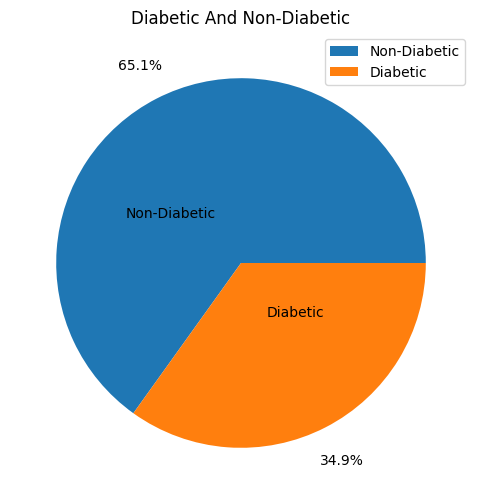

In [5]:
plt.figure(figsize=(6,6))
plt.pie(df['Outcome'].value_counts(),labels=('Non-Diabetic','Diabetic'), autopct='%1.1f%%',
       pctdistance=1.20, labeldistance=.3)
plt.title('Diabetic And Non-Diabetic')
plt.legend()
plt.show()

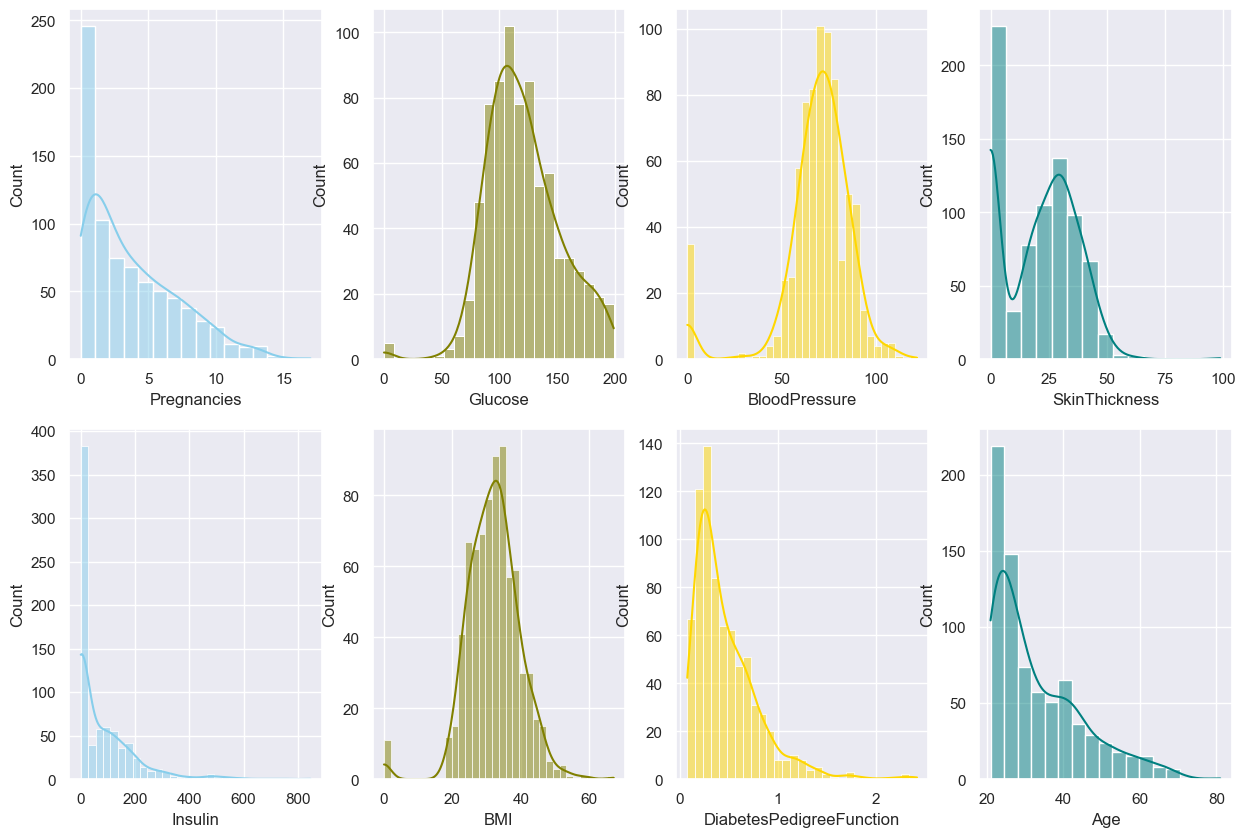

In [6]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(2, 4, figsize=(15, 10))

sns.histplot(data=df, x="Pregnancies", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Glucose", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="BloodPressure", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="SkinThickness", kde=True, color="teal", ax=axs[0, 3])
sns.histplot(data=df, x="Insulin", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=df, x="BMI", kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, color="gold", ax=axs[1, 2])
sns.histplot(data=df, x="Age", kde=True, color="teal", ax=axs[1, 3])
plt.show()

In [7]:
import plotly.graph_objects as go
fig = make_subplots(rows=2, cols=4)
fig.add_trace(go.Box(name='Pregnancies',x=df['Pregnancies']), row=1, col=1)
fig.add_trace(go.Box(name='Glucose',x=df['Glucose']), row=1, col=2)
fig.add_trace(go.Box(name='BloodPressure',x=df['BloodPressure']), row=1, col=3)
fig.add_trace(go.Box(name='SkinThickness',x=df['SkinThickness']), row=1, col=4)
fig.add_trace(go.Box(name='Insulin',x=df['Insulin']), row=2, col=1)
fig.add_trace(go.Box(name='BMI',x=df['BMI']), row=2, col=2)
fig.add_trace(go.Box(name='DiabetesPedigreeFunction',x=df['DiabetesPedigreeFunction']), row=2, col=3)
fig.add_trace(go.Box(name='Age',x=df['Age']), row=2, col=4)
fig.update_layout(title_text="Outliers")
fig.show()

In [8]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,stratify=y,random_state=42)

# Perceptron

In [9]:
ppn = Perceptron()
st = time.time()
ppn.fit(x_train,y_train)
en = time.time()
ppn_time = en - st
ppn_pred = ppn.predict(x_test)

In [10]:
print('################################\n')
print('Perceptron ML Algorithm Test Score: ' + str(round(ppn.score(x_test,y_test) * 100,2)) + '%\n')
print('Perceptron ML Algorithm Train Score: ' + str(round(ppn.score(x_train,y_train) * 100,2)) + '%\n')
print('Perceptron Fit Time: ',ppn_time)
print('################################')
print('\nReport\n')
print('################################')
print(classification_report(y_test,ppn_pred))

################################

Perceptron ML Algorithm Test Score: 63.64%

Perceptron ML Algorithm Train Score: 64.98%

Perceptron Fit Time:  0.04244637489318848
################################

Report

################################
              precision    recall  f1-score   support

           0       0.65      0.93      0.77       100
           1       0.42      0.09      0.15        54

    accuracy                           0.64       154
   macro avg       0.54      0.51      0.46       154
weighted avg       0.57      0.64      0.55       154



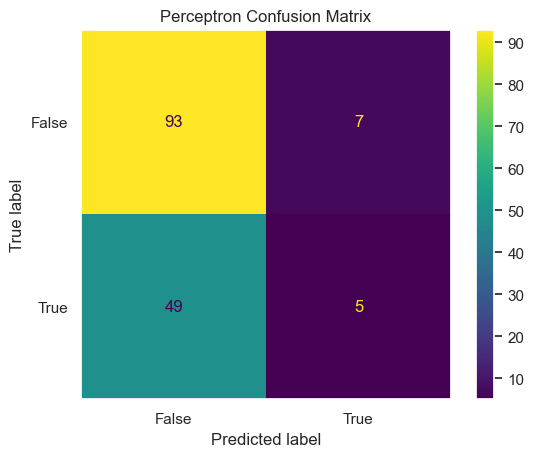

In [11]:
conf_matrix = confusion_matrix(y_test, ppn_pred) 
ppn_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True]) 
  
ppn_display.plot()
plt.grid(False)
plt.title('Perceptron Confusion Matrix')
plt.show()

# LogisticRegression

In [12]:
lr = LogisticRegression(max_iter=200)
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [13]:
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

for sol in solver:
    start = time.time()
    lr = LogisticRegression(solver=sol,max_iter=200)
    lr.fit(x_train,y_train)
    end = time.time()
    print(sol + ' Test Score: ' + str(lr.score(x_test,y_test)))
    print(sol + ' Train Score: ' + str(lr.score(x_train,y_train)))
    print(sol + ' Fit Time: ',end-start)
    print('###############')

lbfgs Test Score: 0.7142857142857143
lbfgs Train Score: 0.7931596091205212
lbfgs Fit Time:  0.04482412338256836
###############
liblinear Test Score: 0.7272727272727273
liblinear Train Score: 0.7850162866449512
liblinear Fit Time:  0.005997419357299805
###############
newton-cg Test Score: 0.7142857142857143
newton-cg Train Score: 0.7931596091205212
newton-cg Fit Time:  0.03058624267578125
###############
newton-cholesky Test Score: 0.7142857142857143
newton-cholesky Train Score: 0.7931596091205212
newton-cholesky Fit Time:  0.3177189826965332
###############
sag Test Score: 0.6818181818181818
sag Train Score: 0.6970684039087948
sag Fit Time:  0.02599787712097168
###############
saga Test Score: 0.6688311688311688
saga Train Score: 0.6889250814332247
saga Fit Time:  0.03299975395202637
###############


c:\Users\MeysaM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\MeysaM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [14]:
lr = LogisticRegression(max_iter=200)
st = time.time()
lr.fit(x_train,y_train)
en = time.time()
lr_time = en - st
lr_pred = lr.predict(x_test)

In [15]:
print('################################\n')
print('Logistic Regression ML Algorithm Test Score: ' + str(round(lr.score(x_test,y_test) * 100,2)) + '%\n')
print('Logistic Regression ML Algorithm Train Score: ' + str(round(lr.score(x_train,y_train) * 100,2)) + '%\n')
print('Logistic Regression Fit Time: ',lr_time)
print('################################')
print('\nReport\n')
print('################################')
print(classification_report(y_test,lr_pred))

################################

Logistic Regression ML Algorithm Test Score: 71.43%

Logistic Regression ML Algorithm Train Score: 79.32%

Logistic Regression Fit Time:  0.04699540138244629
################################

Report

################################
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



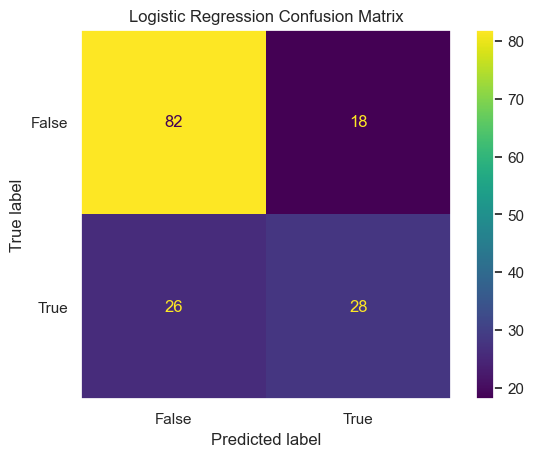

In [16]:
conf_matrix = confusion_matrix(y_test, lr_pred) 
lr_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True]) 
  
lr_display.plot()
plt.grid(False)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [17]:
df['prediction'] = lr.predict(x)

In [18]:

fig = px.scatter(
    df, x='BMI', y='prediction',
    marginal_x='histogram', marginal_y='histogram',
    color='Outcome', trendline='ols'
)
fig.update_traces(histnorm='probability', selector={'type':'histogram'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)

fig.show()

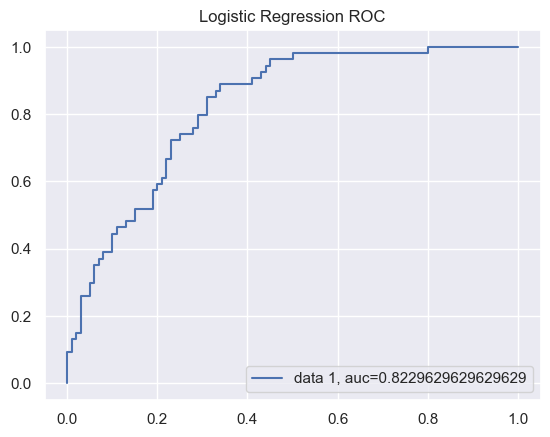

In [19]:
lr_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  lr_pred_proba)
auc = roc_auc_score(y_test, lr_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('Logistic Regression ROC')
plt.show()

# Decision Tree

In [20]:
dt = DecisionTreeClassifier()
st = time.time()
dt.fit(x_train,y_train)
en = time.time()
dt_time = en - st
dt_pred = dt.predict(x_test)

In [21]:
print('################################\n')
print('Logistic Regression ML Algorithm Test Score: ' + str(round(dt.score(x_test,y_test) * 100,2)) + '%\n')
print('Logistic Regression ML Algorithm Train Score: ' + str(round(dt.score(x_train,y_train) * 100,2)) + '%\n')
print('Logistic Regression Fit Time: ',dt_time)
print('################################')
print('\nReport\n')
print('################################')
print(classification_report(y_test,dt_pred))

################################

Logistic Regression ML Algorithm Test Score: 76.62%

Logistic Regression ML Algorithm Train Score: 100.0%

Logistic Regression Fit Time:  0.009652376174926758
################################

Report

################################
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       100
           1       0.72      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



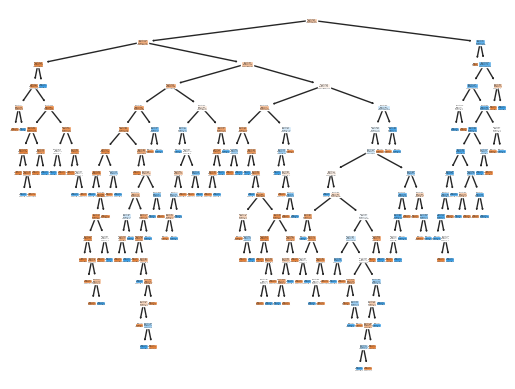

In [22]:
plot_tree(dt,filled = True);

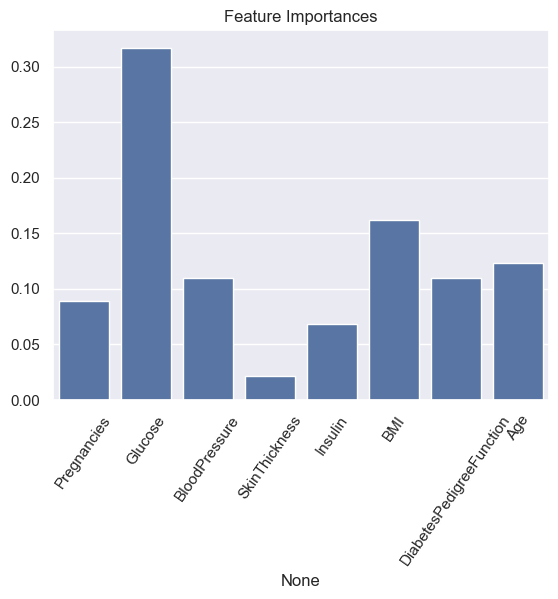

In [23]:
sns.barplot(x=x_train.columns, y=dt.feature_importances_)
plt.xticks(rotation = 55)
plt.title('Feature Importances')
plt.show()

# Final Result

In [24]:
result = {
    'Model Fit Time': [ppn_time,lr_time,dt_time],
    'Test Score': [ppn.score(x_test,y_test),lr.score(x_test,y_test),dt.score(x_test,y_test)],
    'Train Score': [ppn.score(x_train,y_train),lr.score(x_train,y_train),dt.score(x_train,y_train)],
    'Precision Score': [precision_score(y_test,ppn_pred),precision_score(y_test,lr_pred),precision_score(y_test,dt_pred)],
    'Recall Score': [recall_score(y_test,ppn_pred),recall_score(y_test,lr_pred),recall_score(y_test,dt_pred)],
    'F1 Score': [f1_score(y_test,ppn_pred),f1_score(y_test,lr_pred),f1_score(y_test,dt_pred)],
}
result = pd.DataFrame(result, index=['Perceptron','Logistic Regression','Decision Tree'])

In [25]:
result

,Model Fit Time,Test Score,Train Score,Precision Score,Recall Score,F1 Score
Perceptron,0.042446,0.636364,0.649837,0.416667,0.092593,0.151515
Logistic Regression,0.046995,0.714286,0.793160,0.608696,0.518519,0.560000
Decision Tree,0.009652,0.766234,1.000000,0.725000,0.537037,0.617021


In [26]:
fig = make_subplots(rows=2, cols=3)

fig.add_trace(
    go.Bar(y=result['Test Score'],x=result.index,name='Test Score'), 1, 1
)
fig.add_trace(
    go.Bar(y=result['Train Score'],x=result.index,name='Train Score'),1, 2
)

fig.add_trace(
    go.Bar(y=result['Recall Score'],x=result.index,name='Recall Score'),
    1,
    3,
)
fig.add_trace(
    go.Bar(y=result['Precision Score'],x=result.index,name='Precision Score'),2, 1
)

fig.add_trace(
    go.Bar(y=result['F1 Score'],x=result.index,name='F1 Score'),
    2,
    2,
)


fig.show()

In [62]:
px.bar(result['Model Fit Time'],labels={'value':'Time (ms)','index':'ML Algorithm'},color=result.index)
